## Exercise 1  
1. Создайте график $x^2⋅sin(1/x^2)+x$ на интервале $[−1,1]$, используя 250 точек. Не забудьте пометить оси!
2. Создайте semilogy график (с логарифмической шкалой для оси y и линейной шкалой для оси x) относительной разницы  функций $1/(1+x^2)$ и $1/x^2$ на интервале $[5,25]$. (Относительная разница чисел $a$ и $b$ определяется как $|1−a/b|$)
3. В Scipy также есть много менее распространенных специальных функций. Взгляните на обширный список <a href=https://docs.scipy.org/doc/scipy/reference/special.html> здесь</a>! Выберите несколько интересных спец функций, которые вы знаете (или, может быть, не знаете), подставьте несколько чисел и начертите их.


In [ ]:
%matplotlib inline

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

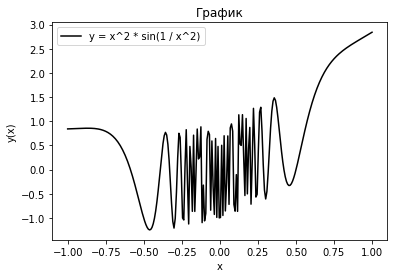

In [4]:
x = np.linspace(-1, 1, 250)
y = x**2 + np.sin(1 / x**2) + x

fig, ax = plt.subplots()

ax.plot(x, y, color='black', linestyle='-', label='y = x^2 * sin(1 / x^2)')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.set_title('График')
ax.legend()

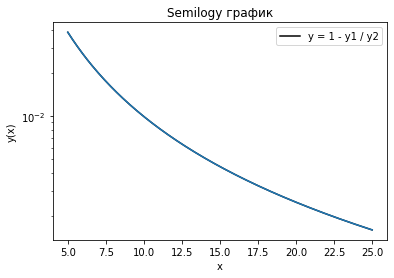

In [5]:
x = np.linspace(5, 25, 250)
y1 = 1 / (1 + x**2)
y2 = 1 / x**2
y = 1 - y1 / y2

fig, ax = plt.subplots()

ax.plot(x, y, color='black', linestyle='-', label='y = 1 - y1 / y2')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.semilogy(x, y)
ax.set_title('Semilogy график')
ax.legend()

In [6]:
import scipy.special

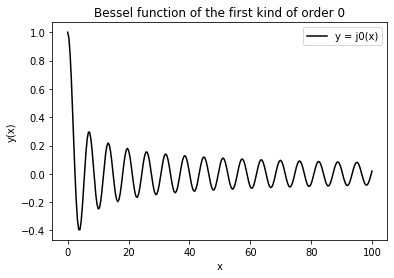

In [11]:
x = np.linspace(0, 100, 250)
y = scipy.special.j0(x)

fig, ax = plt.subplots()

ax.plot(x, y, color='black', linestyle='-', label='y = j0(x)')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.set_title('Bessel function of the first kind of order 0')
ax.legend()

## Exercise 2  
1. Построить график функции $sin(x)/x$ на отрезке $[-6\pi;6\pi]$ и добавить тики по оси $x$ с шагом $\pi/2$ от $-6\pi$ до $6\pi$, причём обозначения тиков должны содержать греческую букву $\pi$. Добавить сетку на график.

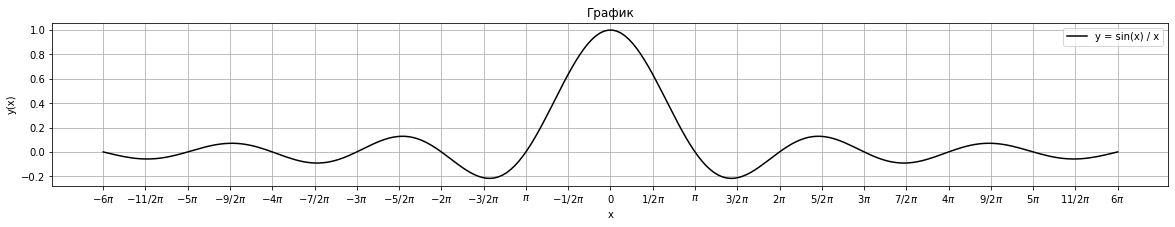

In [85]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 250)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize = (20, 3))

ax.plot(x, y, color='black', linestyle='-', label='y = sin(x) / x')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.set_title('График')

new_x = np.linspace(-6 * np.pi, 6 * np.pi, 25)
ax.set_xticks(new_x)
labels = []
for i in range(25):
    num, denum = (-6 + i/2).as_integer_ratio()
    if num == 0:
        r = '$0$'
    elif denum == 1:
        r = '$' + (str(num) if abs(num) != 1 else '') + '\pi$'
    else:
        r = '$' + str(num) + '/2\pi$'
    labels.append(r)
ax.set_xticklabels(labels)

ax.grid(True)
ax.legend()

## Exercise 3  
1. Создайте цветовой график $sin(x)sin(y)$ на интервале $[−π,π]×[−π,π]$.
2. Создайте цветовой график $e^{-x^2-y^2}$ на интервале $[−3,3]×[−3,3]$.

Text(0.5, 0.92, 'Цветовой график $sin(x)sin(y)$')

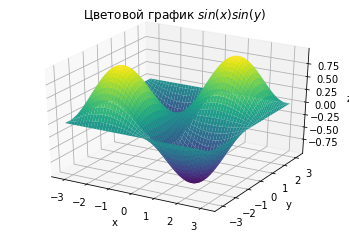

In [4]:
import matplotlib.pyplot as plt

x = np.outer(np.linspace(-np.pi, np.pi, 100), np.ones(100))
y = x.copy().T
z = np.sin(x) * np.sin(y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap ='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Цветовой график $sin(x)sin(y)$')

Text(0.5, 0.92, 'Цветовой график $e^{- x^{2} - y^{2}}$')

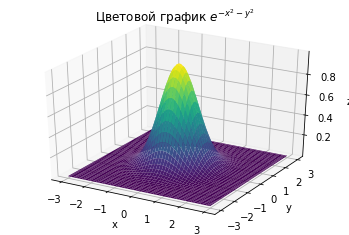

In [3]:
import matplotlib.pyplot as plt

x = np.outer(np.linspace(-3, 3, 100), np.ones(100))
y = x.copy().T
z = np.exp(- x**2 - y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap ='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Цветовой график $e^{- x^{2} - y^{2}}$')

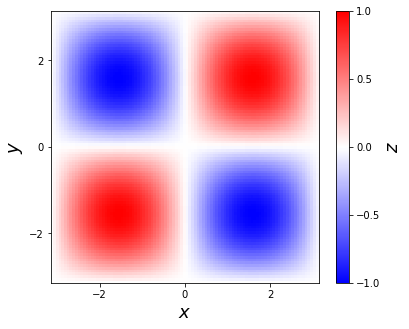

In [80]:
import matplotlib.pyplot as plt

x = y = np.linspace(-np.pi, np.pi, 100)

X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.sin(Y)

fig, ax = plt.subplots(figsize = (6, 5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p = ax.pcolor(X, Y, Z, norm = norm, cmap = mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r'$x$', fontsize = 18)
ax.set_ylabel(r'$y$', fontsize = 18)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax = ax)
cb.set_label(r'$z$', fontsize = 18)
cb.set_ticks(np.linspace(-abs(Z).max(), abs(Z).max(), 5))

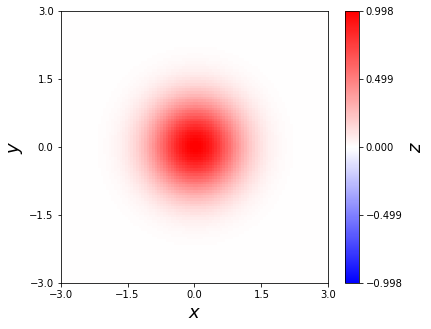

In [81]:
import matplotlib.pyplot as plt

x = y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)
Z = np.exp(- X**2 - Y**2)

fig, ax = plt.subplots(figsize = (6, 5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p = ax.pcolor(X, Y, Z, norm = norm, cmap = mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r'$x$', fontsize = 18)
ax.set_ylabel(r'$y$', fontsize = 18)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax = ax)
cb.set_label(r'$z$', fontsize = 18)
cb.set_ticks(np.linspace(-abs(Z).max(), abs(Z).max(), 5))